<h1 align=center><font size = 15 color = '#0C1150'>Optimal Location to </font> <font size = 20 color = 'red'><em>startup Tuition Classes </em></font> <font size = 8 color = '#0C1150'>or franchise of existing Classes in Mumbai
</font></h1>
<a><img src = "https://isaaclangslow.files.wordpress.com/2013/11/mumbai-skyline-panorama.jpg"> </a>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discussion](#Discussion)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location to startup Tuition Classes or franchise of existing Classes. This analysis will be targeted to stakeholders interested in opening a private Tuition Classes or management of existing Classes to expand thier bussiness & revenue by opening new branch/franchise in Mumbai, India.

Since there are lots of Classes in Mumbai we will try to detect locations that are not already crowded with Classes and having good number of existing Schools & Colleges to ensure sufficient student admistions and less bussiness competition. We will also consider Commercial Property Rates of the locations.

We will use our data science powers to generate a few most promissing Area based on these criteria so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* Number of existing Schools & Colleges in the area.
* Number of existing Tutorials & Classes in the area.
* Commercial Property Rates of the area.

Following data sources will be needed to extract/generate the required information:
* List of all Areas in Mumbai along with their geographical coordinates (latitude & longitude) & location is web-scraped from **Wikipedia** website.
* Commercial property rates of each area is collected from major Indian **online real estate platforms** (like MagicBricks & 99Acres).
* Neighbourhood Schools, Colleges and Classes in each Area will be retrieved using **Foursquare API** (a location data provider).

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Mumbai having high number of Schools & Colleges, low number of existing private tuition Classes and affordable property rates.

Steps:
* Make dataframe containing area name, location, latitude & longitude  data (all 67 Areas) web-scrapped from Wikipedia page (https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai#Other) and commercial property rate (per square feet) from major Indian online real estate platforms (like MagicBricks & 99Acres).
* Plot all Areas on Map showing respective Property Rates using python folium library.
* Collect JSON from **Foursquare API** containing data of all nearby Schools, Colleges & Classes in each of the Areas in radius of 2 kilometres.
* Extract required data from JSON & put it in the dataframes. Then groupby dataframes using Area name such that we will get 
>(1) Total number of schools/colleges in each Area.
(2) Total number of Classes in each Area.
(3) Average property rates of each area.
* Calculate **Business Opportunity Index** for each Area. A good Business Opportunity Index means there are more Schools/Colleges and less Classes in a Area. 
> Business Opportunity Index = (Total no. of Schools & Colleges) / [ (Total no. of Classes & Tutorials) + 1 ]
* Cluster Areas using **k-Means clustering** algorithm. Use **Elbow method** for deciding number of clusters. Parameters  use for clustering each Area will be: 
>(1)Property rates.
>>(2) Business Opportunity Index. 
>>>(a) Total number of Schools & Colleges.
(b) Total number of Classes & Tutorials.
* Select cluster of Areas having high number of Schools & college and less existing Classes and affordable property rates.
* Now, for more short listing of Areas apply a limit on Property prices depending on the investing capacity of the stakeholder.
* Plot the selected optimal areas of map using Folium library.

# Analysis <a name="analysis"></a>

### Importing the Dependencies.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy 
### line added by me :)
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium==0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium==0.5.0       ##or
import folium # map rendering library

print('Libraries imported.')

ERROR: Invalid requirement: '##or'


Libraries imported.


### Scraping the Neighborhoods(Areas) in Mumbai from the Wikipedia Page.

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai#Other"
dfs = pd.read_html(url)

In [3]:
neighborhood_df = dfs[0]
print(neighborhood_df.shape)
neighborhood_df.head(15) 

(93, 4)


,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


### Downloading the Commercial Property Rate Data.

In [4]:
url_1 = 'https://drive.google.com/uc?export=download&id=1a2lBIVAgxwIPtavdJh7CLpObKaxXxuB9'
property_rates_df = pd.read_csv(url_1)
print(property_rates_df.shape)
property_rates_df.head()

(93, 3)


,Area,Location,Rate
0,Amboli,"Andheri,Western Suburbs",18000.0
1,"Chakala, Andheri",Western Suburbs,14750.0
2,D.N. Nagar,"Andheri,Western Suburbs",18000.0
3,Four Bungalows,"Andheri,Western Suburbs",18000.0
4,Lokhandwala,"Andheri,Western Suburbs",18000.0


In [5]:
mumbai_df = pd.merge(neighborhood_df, property_rates_df, on=['Area', 'Location'])
mumbai_df.dropna(inplace=True)
print(mumbai_df.shape)
mumbai_df.head()

(67, 5)


,Area,Location,Latitude,Longitude,Rate
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,18000.0
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,14750.0
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,18000.0
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,18000.0
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,18000.0


In [6]:
new = mumbai_df["Location"].str.split(",", n = 1, expand = True) 
mumbai_df["Location"] = new[0] 
mumbai_df["Suburb"]= new[1] 

for i in range(mumbai_df.shape[0]):
    if mumbai_df.iloc[i, 5] is None:
        mumbai_df.iloc[i, 5] = mumbai_df.iloc[i, 1]

mumbai_df.reset_index(drop=True, inplace=True)
mumbai_df.head()

,Area,Location,Latitude,Longitude,Rate,Suburb
0,Amboli,Andheri,19.129300,72.843400,18000.0,Western Suburbs
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,14750.0,Western Suburbs
2,D.N. Nagar,Andheri,19.124085,72.831373,18000.0,Western Suburbs
3,Four Bungalows,Andheri,19.124714,72.827210,18000.0,Western Suburbs
4,Lokhandwala,Andheri,19.130815,72.829270,18000.0,Western Suburbs


In [7]:
mumbai_df.shape

(67, 6)

### Plotting all Areas on Map showing respective Property Rates.

In [8]:
address = 'Bandra, Mumbai city, India'

geolocator = Nominatim(user_agent="mum_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 19.0549792, 72.8402203.


In [9]:
rate_range = np.linspace(mumbai_df.Rate.min(), mumbai_df.Rate.max(), 5)
rate_range

array([ 8000., 17250., 26500., 35750., 45000.])

**Color code**: 

|Property Rate|Color|
|-------------|------|
| High Property Rate | Black|
| Medium High Property Rate | Blue|
| Medium Low Property Rate | Red|
| Low Property Rate | Orange|

In [10]:
map_Areas = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, area, rate in zip(mumbai_df['Latitude'], mumbai_df['Longitude'], mumbai_df['Area'], mumbai_df['Rate']):
    col = 'orange' if rate<=rate_range[1] else 'red' if rate<=rate_range[2] else "blue" if rate<=rate_range[3] else "black"
    label = '{}, Rs.{}/sq.ft.'.format(area , int(rate))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= col ,
        fill=True,
        fill_color= col ,
        fill_opacity=0.5,
        parse_html=False).add_to(map_Areas)  
    
map_Areas

### Using *FourSquare API* to collect JSON data of all nearby Schools, Colleges & Classes in each of the Areas

In [11]:
CLIENT_ID = 'YZ5ZMVZNRQQ3A0K4FFXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'YXQXO3UPLP0TKPA3I1XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200   # Foursquare API limit value

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
def getNearbyVenues(names, latitudes, longitudes, query_list, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        for query in query_list:
            search_query = query
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
                CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT)
            
            # make the GET request
            results = requests.get(url).json()['response']['venues']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng']) for v in results])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [14]:
Schools_Colleges_df = getNearbyVenues(names=mumbai_df['Area'],
                                   latitudes=mumbai_df['Latitude'],
                                   longitudes=mumbai_df['Longitude'],
                                   query_list=['high school', 'college']
                                  )

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisa
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Vikhroli
Chembur
Mankhurd
Altamount Road
Breach Candy
Churchgate
Cuffe Parade
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Matunga
Parel
Gowalia Tank


In [15]:
print(Schools_Colleges_df.shape)
Schools_Colleges_df.head() 

(4027, 6)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude
0,Amboli,19.1293,72.8434,St. Blaise High School,19.127114,72.846202
1,Amboli,19.1293,72.8434,Faroukh High School,19.131832,72.847237
2,Amboli,19.1293,72.8434,Bhavan's A. H. Wadia High School,19.126847,72.834842
3,Amboli,19.1293,72.8434,Swss high school,19.117710,72.841095
4,Amboli,19.1293,72.8434,Infant Jesus Church & High School,19.131871,72.855746


**Data Cleaning of Schools_Colleges_df**

In [16]:
for i in range(Schools_Colleges_df.shape[0]):
    name = Schools_Colleges_df.loc[i, 'Venue']  
    drop_condition = (("school" not in name) and ("School" not in name) and ("college" not in name) and ("College" not in name))
    if drop_condition:
        Schools_Colleges_df.drop(i, inplace = True)

In [17]:
Schools_Colleges_df.reset_index(inplace = True, drop = True)
print(Schools_Colleges_df.shape)
Schools_Colleges_df.head()

(3485, 6)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude
0,Amboli,19.1293,72.8434,St. Blaise High School,19.127114,72.846202
1,Amboli,19.1293,72.8434,Faroukh High School,19.131832,72.847237
2,Amboli,19.1293,72.8434,Bhavan's A. H. Wadia High School,19.126847,72.834842
3,Amboli,19.1293,72.8434,Swss high school,19.117710,72.841095
4,Amboli,19.1293,72.8434,Infant Jesus Church & High School,19.131871,72.855746


**Dropping unwanted venues**(like driving school, medical & engineering college, etc) from "Schools_Colleges_df".

In [18]:
upperlist = ['Driving', 'Law', 'Engineering', 'Architecture', 'Business', 'Medical', 'Management', 'Defense','Preschool',
             'Pre-Schools', 'Homeopathic', 'Soccer', 'Motor', 'Training', 'Technology', 'Pharmacy', 'Optometry', 
             'Bus Stop', 'Blind School', 'Hostel', 'Dental', 'Style', 'Hospital', 'Acting', 'Soccer', 'Pastry', 'Swimming'] 
lowerlist = [x.lower() for x in upperlist]
list = []
for upper, lower in zip(upperlist, lowerlist):
    list.append(upper)
    list.append(lower)
list[0:10]

['Driving',
 'driving',
 'Law',
 'law',
 'Engineering',
 'engineering',
 'Architecture',
 'architecture',
 'Business',
 'business']

In [19]:
for venue_type in list:
    for i in range(Schools_Colleges_df.shape[0]):
        name = Schools_Colleges_df.loc[i, 'Venue'] 
        if venue_type in name:
            Schools_Colleges_df.drop(i, inplace = True)    
    Schools_Colleges_df.reset_index(inplace = True, drop = True)

In [20]:
print(Schools_Colleges_df.shape)
Schools_Colleges_df.head()

(2886, 6)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude
0,Amboli,19.1293,72.8434,St. Blaise High School,19.127114,72.846202
1,Amboli,19.1293,72.8434,Faroukh High School,19.131832,72.847237
2,Amboli,19.1293,72.8434,Bhavan's A. H. Wadia High School,19.126847,72.834842
3,Amboli,19.1293,72.8434,Swss high school,19.117710,72.841095
4,Amboli,19.1293,72.8434,Infant Jesus Church & High School,19.131871,72.855746


In [21]:
Tutorials_Classes_df = getNearbyVenues(names=mumbai_df['Area'],
                                   latitudes=mumbai_df['Latitude'],
                                   longitudes=mumbai_df['Longitude'],
                                   query_list=['tutorials', 'classes']
                                  )

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisa
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Vikhroli
Chembur
Mankhurd
Altamount Road
Breach Candy
Churchgate
Cuffe Parade
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Matunga
Parel
Gowalia Tank


In [22]:
print(Tutorials_Classes_df.shape)
Tutorials_Classes_df.head() 

(695, 6)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude
0,Amboli,19.1293,72.8434,Harsh Tutorials,19.123740,72.843190
1,Amboli,19.1293,72.8434,Standard Tutorials,19.119875,72.845735
2,Amboli,19.1293,72.8434,Mahesh Tutorials,19.119847,72.845947
3,Amboli,19.1293,72.8434,Mahesh tutorials commerce,19.118845,72.845268
4,Amboli,19.1293,72.8434,Prof. Manish Nadkarni's Tutorials,19.116002,72.831820


In [23]:
len(mumbai_df.Area.unique()), len(Schools_Colleges_df.Area.unique()), len(Tutorials_Classes_df.Area.unique())

(67, 64, 62)

**No. of Schools_Colleges in each Area**

In [24]:
Schools_Colleges_group = Schools_Colleges_df[['Area','Venue']].groupby("Area").count()
Schools_Colleges_group.reset_index(inplace = True, drop = False)
Schools_Colleges_group.head()

,Area,Venue
0,Aarey Milk Colony,10
1,Altamount Road,63
2,Amboli,59
3,Amrut Nagar,38
4,Asalfa,44


**No. of Tutorials_Classes in each Area**

In [25]:
Tutorials_Classes_group = Tutorials_Classes_df[['Area','Venue']].groupby("Area").count()
Tutorials_Classes_group.reset_index(inplace = True, drop = False)
Tutorials_Classes_group.head()

,Area,Venue
0,Altamount Road,9
1,Amboli,21
2,Amrut Nagar,8
3,Asalfa,18
4,Ballard Estate,4


In [26]:
mumbai_df[['Area','Latitude','Longitude','Rate']].head()

,Area,Latitude,Longitude,Rate
0,Amboli,19.129300,72.843400,18000.0
1,"Chakala, Andheri",19.111388,72.860833,14750.0
2,D.N. Nagar,19.124085,72.831373,18000.0
3,Four Bungalows,19.124714,72.827210,18000.0
4,Lokhandwala,19.130815,72.829270,18000.0


In [27]:
merge_temp = pd.merge(mumbai_df[['Area','Latitude','Longitude','Rate']], Schools_Colleges_group, on = "Area", how = "outer")
merge_temp.rename(columns = {'Venue' : 'Schools_Colleges'}, inplace = True)
Area_df = merge_temp.merge(Tutorials_Classes_group, on = "Area", how = "outer")
Area_df.rename(columns = {'Venue' : 'Tutorials_Classes'}, inplace = True)

In [28]:
print(Area_df.shape)
Area_df = Area_df.fillna(0)
Area_df.head()

(67, 6)


,Area,Latitude,Longitude,Rate,Schools_Colleges,Tutorials_Classes
0,Amboli,19.129300,72.843400,18000.0,59.0,21.0
1,"Chakala, Andheri",19.111388,72.860833,14750.0,49.0,27.0
2,D.N. Nagar,19.124085,72.831373,18000.0,58.0,22.0
3,Four Bungalows,19.124714,72.827210,18000.0,58.0,22.0
4,Lokhandwala,19.130815,72.829270,18000.0,59.0,14.0


* Calculate **Business Opportunity Index** for each Area. A good Business Opportunity Index means there are more Schools/Colleges and less Classes in a Area. 
> Business Opportunity Index = (Total no. of Schools & Colleges) / [ (Total no. of Classes & Tutorials) + 1 ]

In [29]:
Area_df["Startup Opportunity Index"] = Area_df["Schools_Colleges"]/(Area_df["Tutorials_Classes"] + 1)
Area_df = Area_df.round({"Startup Opportunity Index":3}) 
Area_df.sort_values(by = 'Startup Opportunity Index', ascending=False, inplace = True) 
Area_df.reset_index(inplace = True, drop = True)
Area_df.head()

,Area,Latitude,Longitude,Rate,Schools_Colleges,Tutorials_Classes,Startup Opportunity Index
0,Parel,18.99,72.840,18000.0,40.0,2.0,13.333
1,Kanjurmarg,19.13,72.940,10550.0,13.0,0.0,13.000
2,Worli,19.00,72.815,27500.0,25.0,1.0,12.500
3,Churchgate,18.93,72.820,28500.0,61.0,4.0,12.200
4,Ballard Estate,18.95,72.840,29000.0,60.0,4.0,12.000


# K-Means Clustering

### Pre-processing

In [30]:
clustering_data = Area_df[['Rate', 'Startup Opportunity Index']]
clustering_data.head()

,Rate,Startup Opportunity Index
0,18000.0,13.333
1,10550.0,13.000
2,27500.0,12.500
3,28500.0,12.200
4,29000.0,12.000


Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [31]:
from sklearn.preprocessing import StandardScaler

clustering_data = StandardScaler().fit_transform(clustering_data)
clustering_data[0:5]

array([[-0.30779519,  2.43127857],
       [-1.12219207,  2.33122442],
       [ 0.73069747,  2.18099297],
       [ 0.84001249,  2.09085409],
       [ 0.89467   ,  2.03076151]])

We will be choosing optimum number of clusters by using **Elbow method**.

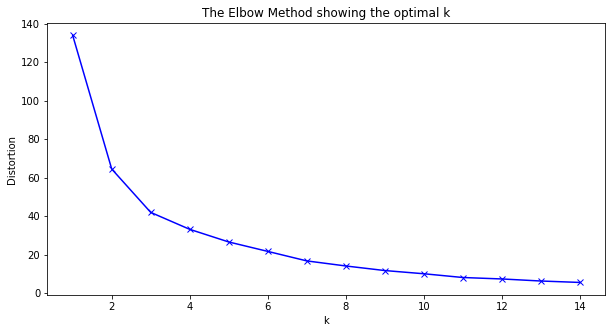

In [32]:
import matplotlib.pyplot as plt
#Area_cluster = mum_bai_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(init = "k-means++", n_clusters=k)
    kmeanModel.fit(clustering_data)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The Elbow Method suggests 2 as the optimum number of clusters, as the distortion in the data drops suddenly at 2 clusters and very slowly decreases from there. But considering insights from the exploratory data analysis, we will proceed with grouping the data into 3 clusters, as it will be easier to gather insights that way.

### Modeling

In [33]:
kclusters = 3
kmeanModel = KMeans(init="k-means++", n_clusters=kclusters, random_state=0)
kmeanModel.fit(clustering_data)
cluster_labels = kmeanModel.labels_      
cluster_labels                   # check cluster labels generated for each row in the datapoint

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0])

### Cluster insights

In [34]:
Area_df['Cluster'] = cluster_labels
Area_df.head()

,Area,Latitude,Longitude,Rate,Schools_Colleges,Tutorials_Classes,Startup Opportunity Index,Cluster
0,Parel,18.99,72.840,18000.0,40.0,2.0,13.333,2
1,Kanjurmarg,19.13,72.940,10550.0,13.0,0.0,13.000,2
2,Worli,19.00,72.815,27500.0,25.0,1.0,12.500,2
3,Churchgate,18.93,72.820,28500.0,61.0,4.0,12.200,2
4,Ballard Estate,18.95,72.840,29000.0,60.0,4.0,12.000,2


In [35]:
Clusters_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add Selected_Areas to map
for lat, lng, area, cluster in zip(Area_df['Latitude'], Area_df['Longitude'], Area_df['Area'],
                                           Area_df['Cluster']):
    col = 'orange' if cluster==0 else 'red' if cluster==1 else "blue"
    label = '{}, Cluster {}'.format(area ,cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= col ,
        fill=True,
        fill_color= col ,
        fill_opacity=0.7,
        parse_html=False).add_to(Clusters_map)      
Clusters_map

In [36]:
insight_columns = ['Rate','Schools_Colleges','Tutorials_Classes','Startup Opportunity Index','Cluster']
Cluster_insights = Area_df[insight_columns].groupby("Cluster").mean()
Cluster_insights.insert(0, 'No. of Areas', Area_df[['Area','Cluster']].groupby("Cluster").count())
Cluster_insights.columns = ['No. of Areas','Average Property Rate','Average No. of Schools & Colleges','Average No. of Tutorials & Classes',
                            'Startup Opportunity Index']
Cluster_insights

,No. of Areas,Average Property Rate,Average No. of Schools & Colleges,Average No. of Tutorials & Classes,Startup Opportunity Index
Cluster,,,,,
0,40,15616.250000,42.625000,13.575000,3.267425
1,15,33983.333333,44.333333,7.600000,6.093867
2,12,21687.500000,43.000000,3.166667,10.754750


 **Cluster insights**:
 
 All Clusters have similar 'Average No. of Schools & Colleges'
 * Cluster 0: Low 'Average Property Rate', More 'Average No. of Tutorials & Classes', Low 'Startup Opportunity Index'.
 * Cluster 1: High 'Average Property Rate', Moderate 'Average No. of Tutorials & Classes', Medium 'Startup Opportunity Index'.
 * Cluster 2: Medium 'Average Property Rate', Less 'Average No. of Tutorials & Classes', High 'Startup Opportunity Index'.

|Cluster| Property Rate|Startup Opportunity Index|No. of Bussiness Competitors|
|-----|--------|------|---------|
|0   | Cheap | Low|High|
|1   | Expensive   | Medium|Medium|
|2   | Mid-Range  | High|Low|

**Selecting "Cluster 2"** as it has less business competitors & moderate/affordable property rates.

In [37]:
Cluster_2 = Area_df[Area_df['Cluster'] == 2]
Cluster_2

,Area,Latitude,Longitude,Rate,Schools_Colleges,Tutorials_Classes,Startup Opportunity Index,Cluster
0,Parel,18.990000,72.840000,18000.0,40.0,2.0,13.333,2
1,Kanjurmarg,19.130000,72.940000,10550.0,13.0,0.0,13.000,2
2,Worli,19.000000,72.815000,27500.0,25.0,1.0,12.500,2
3,Churchgate,18.930000,72.820000,28500.0,61.0,4.0,12.200,2
4,Ballard Estate,18.950000,72.840000,29000.0,60.0,4.0,12.000,2
5,Nariman Point,18.926000,72.823000,33500.0,56.0,4.0,11.200,2
6,Bangur Nagar,19.167362,72.832252,13500.0,50.0,4.0,10.000,2
7,Aarey Milk Colony,19.148493,72.881756,12950.0,10.0,0.0,10.000,2
10,Marine Lines,18.944700,72.824400,29000.0,76.0,7.0,9.500,2
11,Dagdi Chawl,18.977129,72.829131,17000.0,44.0,4.0,8.800,2


Now, for more short listing of Areas apply a limit on Property prices depending on the investing capacity of the stakeholder.

In [38]:
condition_PropertyRateLimit = Cluster_2['Rate'] <= 15000
Selected_Areas = Cluster_2 [condition_PropertyRateLimit]
Selected_Areas.reset_index(inplace = True, drop = True)
Selected_Areas = Selected_Areas.merge(neighborhood_df, on = ["Area","Latitude","Longitude"], how = "inner")
cols = Selected_Areas.columns.tolist()
cols = cols[0:1] + cols[-1:] + cols[1:-1]
Selected_Areas = Selected_Areas[cols]
Selected_Areas

,Area,Location,Latitude,Longitude,Rate,Schools_Colleges,Tutorials_Classes,Startup Opportunity Index,Cluster
0,Kanjurmarg,Eastern Suburbs,19.130000,72.940000,10550.0,13.0,0.0,13.0,2
1,Bangur Nagar,"Goregaon,Western Suburbs",19.167362,72.832252,13500.0,50.0,4.0,10.0,2
2,Aarey Milk Colony,"Goregaon,Western Suburbs",19.148493,72.881756,12950.0,10.0,0.0,10.0,2


In [39]:
Selected_Areas_map = folium.Map(location=[19.088493, 72.881756], zoom_start=11)

# add Selected_Areas to map
for lat, lng, area, rate, location in zip(Selected_Areas['Latitude'], Selected_Areas['Longitude'], Selected_Areas['Area'],
                                           Selected_Areas['Rate'], Selected_Areas['Location']):
    label = 'Area: {}, Location: {}, Property Rate: Rs.{}/sq.ft.'.format(area ,location, int(rate))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= 'blue' ,
        fill=True,
        fill_color= 'blue' ,
        fill_opacity=0.7,
        parse_html=False).add_to(Selected_Areas_map)  
    
Selected_Areas_map

## Results <a name="results"></a>

Optimal Locations to startup Tuition Classes or franchise of existing Classes in Mumbai having high number of Schools & college and less existing Classes and affordable property rates are
* Kanjurmarg
* Bangur Nagar
* Aarey Milk Colony	

## Discussion<a name="Discussion"></a>

Our analysis shows that:
* Property rates are increasing as we move from North to South region of Mumbai. 'Cluster 2' is in central region of Mumbai, therefore having mid-range Properties Rates. 
* All 3 Clusters are having similar number of Schols & Colleges. But 'Cluster 2' is having lowest number of existing Classes & Tutorials, resulting in less Bussiness competition, therefore having good Bussiness Opportunity.

Suggestions for Future research:
* Population Density of each Areas can be web-scrapped from Wikipedia and can be a parameter/feature in clustering locations. 
* Areas with high Population Density should be given preferences.

## Conclusion <a name="conclusion"></a>

In this project, we have gone through the process of identifying the business problem , specifying the data required, extracting and preparing the data, performing machine learning by clustering the data into 3 clusters(no. of cluster decided by Elbow Method) based on their similarities, and lastly providing recommendations to the stakeholders interested in opening a private Tuition Classes or management of existing Classes to expand thier bussiness & revenue by opening new branch/franchise in Mumbai. To answer the business question that was raised in the introduction session , the answer proposed by this project is: The Areas in cluster 2 are the most optimal locations to open a new Classes and with a properties rates limit depending on investment capacity of stakeholders(Rupees 15,000/- per square feet), top 3 optimal Areas are (1) Kanjurmarg. (2) Bangur Nagar. (3) Aarey Milk Colony.